In [35]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit

n = 15
N = 2000000
sample = 70

Npoints = [500,5000,10000,50000,100000,200000,500000,800000,1000000,1500000,2000000]

# comment/uncomment if you want to try the symmetric/non symmeric case

################# SYMMETRIC
x = np.random.randn(N,n)
###########################

############# NON SYMMETRIC
# x = np.random.exponential(1., (N,int(n/2)))
# x = np.append(x,np.random.exponential(5., (N,int(n/2))),axis=1)
###########################

In [36]:
mean_t = 0.

time_rand = np.zeros((len(Npoints),sample))
iterations_rand = np.zeros((len(Npoints),sample))

min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))

for k in range(len(Npoints)):    
    print("N="+str(Npoints[k]))
    for i in range(sample):

        tic = timeit.default_timer()
        w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_Mor_reset(
                        x[:Npoints[k],:]-np.mean(x[:Npoints[k],:],0), n**3)
        time_rand[k,i] = (timeit.default_timer()-tic)*1000
        iterations_rand[k,i] = iterations

        mean_t += time_rand[k,i]
        print("sample = ", i)
        print("time = ", time_rand[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
    print("N="+str(Npoints[k]))
    mean_t = 0.
    
mean_t = np.mean(time_rand,1)
min_t = np.min(time_rand,1)
max_t = np.max(time_rand,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N=500
sample =  0
time =  4.6229469999161665 ms
mean time =  4.6229469999161665 ms
sample =  1
time =  5.8261110002604255 ms
mean time =  5.224529000088296 ms
sample =  2
time =  5.544162999740365 ms
mean time =  5.331073666638986 ms
sample =  3
time =  2.0523729999695206 ms
mean time =  4.5113984999716195 ms
sample =  4
time =  4.71491899998 ms
mean time =  4.552102599973296 ms
sample =  5
time =  1.2809859999833861 ms
mean time =  4.006916499974977 ms
sample =  6
time =  5.044849000114482 ms
mean time =  4.155192571423478 ms
sample =  7
time =  5.478956999922957 ms
mean time =  4.320663124985913 ms
sample =  8
time =  4.047579000143742 ms
mean time =  4.290320444447894 ms
sample =  9
time =  5.598341000222717 ms
mean time =  4.421122500025376 ms
sample =  10
time =  4.792616000031558 ms
mean time =  4.454894636389574 ms
sample =  11
time =  1.9474299997455091 ms
mean time =  4.245939250002569 ms
sample =  12
time =  4.136234000270633 ms
mean time =  4.237500384638574 ms
sample =  13


In [37]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

sample_FC = 10
time_FC = np.zeros((len(Npoints),sample_FC))

for k in range(len(Npoints)):
    print("N="+str(Npoints[k]))
    for i in range(sample_FC):
        tic = timeit.default_timer()
        Fast_Caratheodory(x[:Npoints[k],:],np.ones(Npoints[k]),n+1)
        time_FC[k,i] = (timeit.default_timer()-tic)*1000

print("mean FC = ", np.mean(time_FC,1), " ms")
print("std FC = ", np.std(time_FC,1))

N=500
N=5000
N=10000
N=50000
N=100000
N=200000
N=500000
N=800000
N=1000000
N=1500000
N=2000000
mean FC =  [ 13.4218081  21.5993814  24.8595176  39.5884753  52.3877655  82.4265936
 189.6327085 253.2742032 328.0520196 501.6286128 615.6110575]  ms
std FC =  [1.81298714 1.56182803 1.54239165 1.40865826 1.62737733 2.21457398
 2.07989419 2.61619454 2.68379179 2.22419298 5.1472106 ]


In [38]:
print("Probability to be faster = ", 
            np.sum(time_rand<np.mean(time_FC,1)[np.newaxis].T,1)/sample*100, "%")
print("Probability to be 4x faster = ", 
            np.sum(time_rand<np.mean(time_FC,1)[np.newaxis].T/4,1)/sample*100, "%")

print("Standard deviation = ", np.std(time_rand,1))

Probability to be faster =  [100.         100.         100.          98.57142857  94.28571429
  95.71428571  98.57142857  98.57142857  98.57142857  38.57142857
  50.        ] %
Probability to be 4x faster =  [22.85714286 75.71428571 75.71428571 11.42857143 12.85714286  7.14285714
  0.          0.          0.          0.          0.        ] %
Standard deviation =  [  1.16809817   1.6597923    2.43223418   5.71384874  11.52734248
  17.96978598  46.39499453  79.89958959 107.03535267 259.1557455
 358.98748841]


In [39]:
mean_t = 0.
time_log = np.zeros((len(Npoints),sample))
iterations_rand = np.zeros((len(Npoints),sample))

min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))

for k in range(len(Npoints)):    
    print("N="+str(Npoints[k]))
    for i in range(sample):
        x_cp = np.copy(x)
        
        tic = timeit.default_timer()
        rb.recomb_log(x_cp[:Npoints[k],:])
        time_log[k,i] = (timeit.default_timer()-tic)*1000

        mean_t += time_log[k,i]
        print("sample = ", i)
        print("time = ", time_log[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
    
    print("N="+str(Npoints[k]))
    mean_t = 0.
    
mean_t = np.mean(time_log,1)
min_t = np.min(time_log,1)
max_t = np.max(time_log,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N=500
sample =  0
time =  1.3613950000035402 ms
mean time =  1.3613950000035402 ms
sample =  1
time =  2.8278280001359235 ms
mean time =  2.094611500069732 ms
sample =  2
time =  1.0084519999509212 ms
mean time =  1.7325583333634615 ms
sample =  3
time =  3.4876019999501295 ms
mean time =  2.1713192500101286 ms
sample =  4
time =  2.5546420001774095 ms
mean time =  2.247983800043585 ms
sample =  5
time =  3.9867630002845544 ms
mean time =  2.53778033341708 ms
sample =  6
time =  2.802161999625241 ms
mean time =  2.5755491428753885 ms
sample =  7
time =  2.7749930000027234 ms
mean time =  2.6004796250163054 ms
sample =  8
time =  1.4671509998152032 ms
mean time =  2.4745542222161827 ms
sample =  9
time =  3.0935489999137644 ms
mean time =  2.536453699985941 ms
sample =  10
time =  3.415770000174234 ms
mean time =  2.616391545457604 ms
sample =  11
time =  1.4827479999439674 ms
mean time =  2.5219212499981345 ms
sample =  12
time =  1.897294000173133 ms
mean time =  2.473873000011596 ms


In [40]:
mean_t = 0.

time_TL = np.zeros((len(Npoints),sample_FC))
min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))

for k in range(len(Npoints)):    
    print("N="+str(Npoints[k]))
    for i in range(sample_FC):
        x_cp = np.copy(x)
        
        tic = timeit.default_timer()  
        rb.Tchernychova_Lyons(x_cp[:Npoints[k],:])
        time_TL[k,i] = (timeit.default_timer()-tic)*1000

        mean_t += time_TL[k,i]
        print("sample = ", i)
        print("time = ", time_TL[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
    
    print("N="+str(Npoints[k]))
    mean_t = 0.
    
mean_t = np.mean(time_TL,1)
min_t = np.min(time_TL,1)
max_t = np.max(time_TL,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N=500
sample =  0
time =  5.503905999830749 ms
mean time =  5.503905999830749 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  1
time =  5.828705000112677 ms
mean time =  5.666305499971713 ms
sample =  2
time =  5.471897999996145 ms
mean time =  5.601502999979857 ms
sample =  3
time =  5.330610999862984 ms
mean time =  5.533779999950639 ms
sample =  4
time =  5.122882000250684 ms
mean time =  5.451600400010648 ms
sample =  5
time =  5.5042260000846 ms
mean time =  5.460371333356306 ms
sample =  6
time =  5.55601599990041 ms
mean time =  5.474034857148321 ms
sample =  7
time =  5.302683000081743 ms
mean time =  5.452615875014999 ms
sample =  8
time =  5.363147000025492 ms
mean time =  5.442674888905054 ms
sample =  9
time =  5.064307999873563 ms
mean time =  5.404838200001905 ms
N=500
N=5000
sample =  0
time =  11.78230599998642 ms
mean time =  11.78230599998642 ms
sample =  1
time =  8.640552000088064 ms
mean time =  10.211429000037242 ms
sample =  2
time =  7.7404620001289 ms
mean time =  9.387773333401128 ms
sample =  3
time =  10.18893400032539 ms
mean time =  9.588063500132193 ms
sample =  4
time

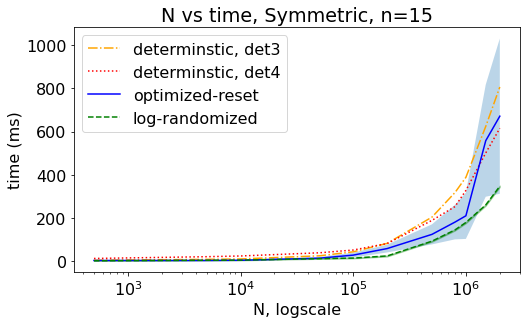

In [42]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,4.5))

plt.plot(Npoints,np.mean(time_TL,1), '-.', label="determinstic, det3", color='orange')
plt.plot(Npoints,np.mean(time_FC,1), ':', label="determinstic, det4", color='red')

plt.plot(Npoints,np.mean(time_rand,1), '-', label="optimized-reset", color='blue')
error = np.std(time_rand,axis=1)
plt.fill_between(Npoints, 
                 np.mean(time_rand,1)-error, 
                 np.mean(time_rand,1)+error, 
                 alpha=0.3)

plt.plot(Npoints,np.mean(time_log,1), '--', label="log-randomized", color='green')
plt.fill_between(Npoints, 
                 np.mean(time_log,1)-np.std(time_log,1), 
                 np.mean(time_log,1)+np.std(time_log,1), 
                 alpha=0.3, color='green')

plt.xlabel('N, logscale')
plt.ylabel('time (ms)')
plt.title('N vs time, Symmetric, n='+str(n))
# plt.axvline(2*n, 0, max(Npoints), color="red")
plt.xscale('log') 
# plt.yscale('log') 
# plt.ylim([0,np.max(np.mean(time_rand,1))])
plt.legend()

# fig.tight_layout()
# plt.savefig('Synthetic_Nvsn_n15_logx_70samples_symmetric.pdf', bbox_inches='tight')
plt.show()
